# Sources

In prose, objects detected in astronomical images are represented by `Source` objects. To encompass the large variety of sources encountered in astronomical images, prose fatures three kinds of sources:

- [PointSource](prose.core.source.PointSource): star
- [ExtendedSource](prose.core.source.ExtendedSource): comet, galaxy or lensed source
- [TraceSource](prose.core.source.TraceSource): diffracted spectrum, satellite streak or cosmic ray

To demonstrate how to use these objects, we will work on the following example image:

/Users/lgrcia/code/dev/prose/prose/console_utils.py:15: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


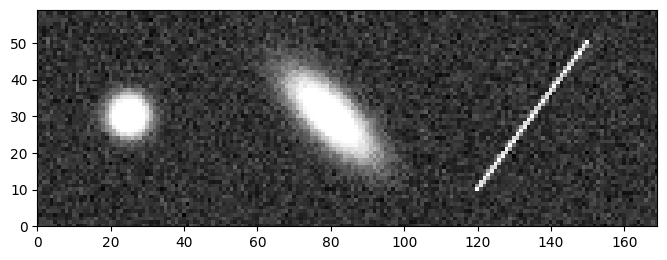

In [1]:
from prose.simulations import source_example

im = source_example()
_ = im.show()


## Detection

To detect these sources, detection blocks from the `prose.blocks.detection` module can be used:

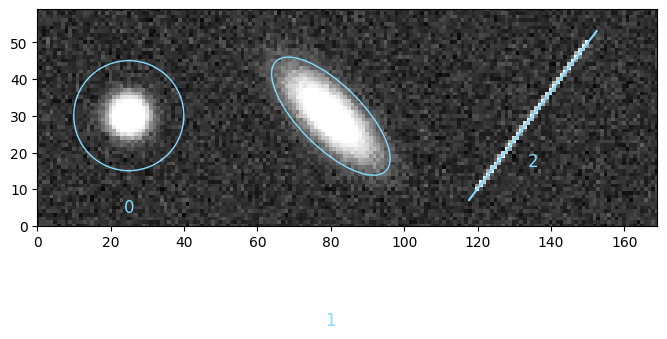

In [2]:
from prose import blocks

im = blocks.detection.AutoSourceDetection(min_area=2.0)(im)
_ = im.show()

```{note}
Source-specific detection blocks are also available, like the `PointSourceDetection`, as well as blocks with legacy detection algorithms such as `DAOFindStars`
```

From here, sources are located in the `Image.sources` object

In [3]:
im.sources


array([PointSource(a=7.299370327685445, b=7.045896789572303, orientation=2.898054795754745, coords=array([24.93153186, 30.05832201]), peak=708.9866319168277, i=0, discarded=False),
       ExtendedSource(a=19.218763018504706, b=7.771960949993868, orientation=2.3586657332849414, coords=array([80.00745693, 29.9136897 ]), peak=606.2933904356016, i=1, discarded=False),
       TraceSource(a=28.844058543474247, b=0.8649428164975537, orientation=0.9239457592092833, coords=array([135.04552646,  30.07826189]), peak=519.8785180135485, i=2, discarded=False)],
      dtype=object)

where we can identify the three types of sources, like an extended source at index 1

In [4]:
print(im.sources[1])


⬭ ExtendedSource 1
  ----------------
  coords   80.01   29.91
  a, b     19.22    7.77
  e         0.40


## Sources properties

Such sources contain useful properties and methods used throughout prose to perform image processing.

### Apertures

Apertures from the `photutils.aperture` module can easily be instantiated from a `Source` object

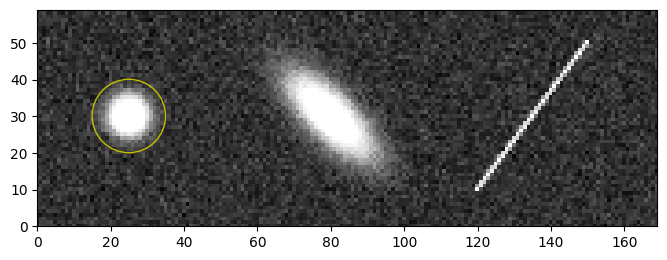

In [5]:
import matplotlib.pyplot as plt

source = im.sources[0]
aperture = source.circular_aperture(10, scale=False)

# plotted on top of the image
im.show(sources=False)
_ = aperture.plot(color="y")


For automatic treatments, the `Source.aperture` method provides an aperture specific to each type of source

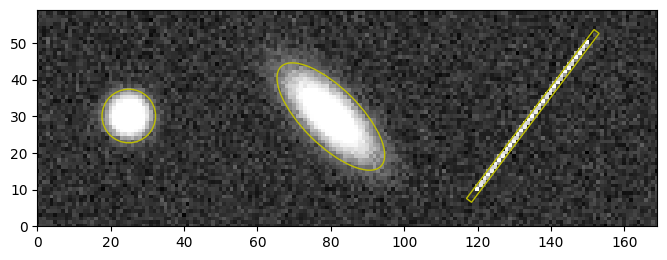

In [6]:
im.show(sources=False)

for source in im.sources:
    aperture = source.aperture()
    _ = aperture.plot(color="y")


and associated annulus methods

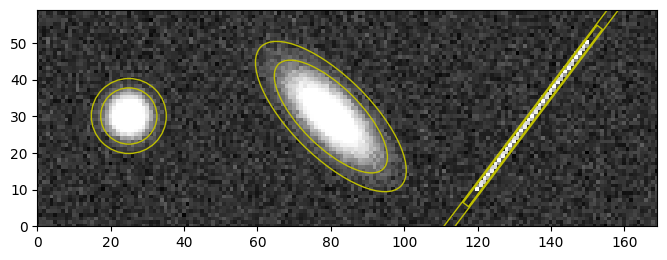

In [7]:
im.show(sources=False)

for source in im.sources:
    aperture = source.annulus()
    _ = aperture.plot(color="y")
